In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso, RidgeCV, LassoCV, ElasticNet,ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import pickle

In [7]:
df= pd.read_csv("D:\Study\Data Science\Python\ineuron\Data_Set\Student_dataset\stud_clean_for_model.csv")
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,math score,reading score,writing score
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.381044,0.180350,0.385487
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.174067,1.451912,1.333961


## 1.1Storing Features in X and Y dataframe

In [8]:
# Y is our Dependent variable which we need to predict
y = df['math score']

# X contains our independent variable 
X= df.copy()
X.drop(['math score','reading score','writing score'], axis= 1, inplace = True)

## 1.2 Splitting the data into Train and Test


In [9]:
# Training dataset which will be used to train our model is stored in X_train and y_train
# Testing dataset which will be used to test our data or to get the score of the data is stored in X_test and y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

## 1.3 Creating Model using Training Data Set

In [10]:
#Creating an object of LinearRegression
admission_linear_model =LinearRegression()

#Generating Linear Model based on Feature TV and label Sale and fitting the model
admission_linear_model.fit(X_train,y_train)

#Calculating the co-efficient value
m = admission_linear_model.coef_
#Calculating the Intercept values
c = admission_linear_model.intercept_


print(f"Co-efficient value: {m}")
print(f"Linear Intercept value : {'{:.2}'.format(c)}")

Co-efficient value: [ 8.54451899e+12  8.54451899e+12  4.17454378e+13  4.17454378e+13
  4.17454378e+13  4.17454378e+13  4.17454378e+13 -3.87843676e+12
 -3.87843676e+12 -3.87843676e+12 -3.87843676e+12 -3.87843676e+12
 -3.87843676e+12  5.23441760e+12  5.23441760e+12 -1.26367508e+13
 -1.26367508e+13]
Linear Intercept value : -3.9e+13


In [11]:
#dumping the model in pickle file which can be shared with others
file = "student_performance_linear_model_reg.sav"
pickle.dump(admission_linear_model,open(file,'wb'))

### 1.4 Getting the Accuracy or Score of the Model

We will use Test data instead of training data to get the score of the model
Which is basically the R-Square(R**2) 

R**2 =  1- (RSS/TSS) </br>
R**2 =  1- (Residual sum of square/Total sum of square)

In [12]:
model_score = admission_linear_model.score(X_test,y_test)
print(f"Score of our Linear Model(R**2) is: {'{:.2%}'.format(model_score)}")

Score of our Linear Model(R**2) is: 24.21%


In [13]:
# creating a function of Adjusted R2

def adj_r2(x,y):
    r2= admission_linear_model.score(x,y)
    n= x.shape[0]
    print(f"Number of Elements in test data is : {n}")
    p = x.shape[1]
    print(f"Number of Predictors in test data is : {p}")
    adjusted_r2= 1-(1-r2)*(n-1)/(n-p-1)
    return(adjusted_r2)

In [14]:
#printing adjusted_r2 score
model_score = adj_r2(X_test,y_test)
print(f"Score of our Linear Model(Adjusted R**2) : {'{:.2%}'.format(model_score)}")

Number of Elements in test data is : 250
Number of Predictors in test data is : 17
Score of our Linear Model(Adjusted R**2) : 18.65%


### 1.5 Improving the accuracy of the model

1. While splitting the train and test data, we can change the random state, increase of decrease it, generally decrease is the right option
2. we can change the test size, decreasing will be a good option
3. Retrain the model and then find R2 and AdjustedR2

### 1.5.1 Regularization using LASSO

If we are able to control error term then we can generalize our mode </br>
It limits the size of coefficients by adding a penalty which is equal to absolute value of magnitude of coefficients. </br>

LASSO = Least Absolute Shrinkage Selection Operation also called as L1 Regularization </br>
L1 = RSS + (Shrinkage Factor  * Summation of Coefficient)

In [15]:
lassocv = LassoCV(alphas = None, cv=10,max_iter = 20000000, normalize = True)
lassocv.fit(X_train,y_train)

LassoCV(cv=10, max_iter=20000000, normalize=True)

In [16]:
#it is the shrinkage factor also called as alpha
lassocv.alpha_

0.0003405513796162699

In [17]:
# create model Lasso using alpha value and fit the model using training dataset
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0003405513796162699)

In [18]:
#test the ridge model using  test data
model_score_regularization = lasso.score(X_test,y_test)

# Get the score of the Lasso model
print(f"Score of our Linear Model after regularization : {'{:.2%}'.format(model_score_regularization)}")

Score of our Linear Model after regularization : 24.05%


# Step 

In [27]:
!pip install catboost

In [28]:
!pip install xgboost

In [29]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [36]:
df1= pd.read_csv("D:\Study\Data Science\Python\ineuron\Data_Set\Student_dataset\outlier_removed.csv")
df1.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [37]:
X = df.drop(columns=['math score'],axis=1)

In [38]:
y = df['math score']

In [39]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [40]:
X = preprocessor.fit_transform(X)

In [41]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [42]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [43]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.4387
- Mean Absolute Error: 0.3150
- R2 Score: 0.8065
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5201
- Mean Absolute Error: 0.3309
- R2 Score: 0.7318


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.9973
- Mean Absolute Error: 0.8007
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.0122
- Mean Absolute Error: 0.8133
- R2 Score: -0.0155


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.4387
- Mean Absolute Error: 0.3151
- R2 Score: 0.8065
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5198
- Mean Absolute Error: 0.3308
- R2 Score: 0.7321


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.5735
- Mean Absolute Error: 0.4548
- R2 Score: 0.6693
----------------------

### Results

In [44]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.732149
0,Linear Regression,0.731819
7,CatBoosting Regressor,0.725752
5,Random Forest Regressor,0.712896
8,AdaBoost Regressor,0.698257
6,XGBRegressor,0.673221
4,Decision Tree,0.632197
3,K-Neighbors Regressor,0.391970
1,Lasso,-0.015544


# Linear Regression

In [45]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 73.18


## Plot y_pred and y_test

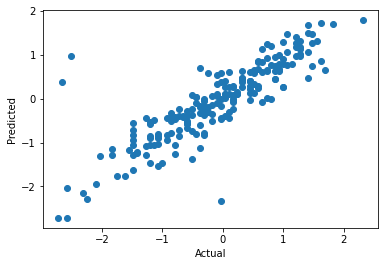

In [46]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

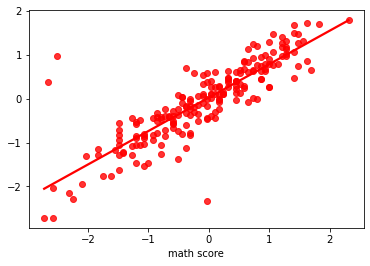

In [47]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [48]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,1.691895,0.656817,1.035078
737,-0.929808,-0.447239,-0.482568
740,0.932981,0.684300,0.248682
660,0.519028,0.648211,-0.129183
411,1.208950,1.411255,-0.202305
...,...,...,...
408,-0.998800,-1.468135,0.469335
332,-0.308878,-0.235197,-0.073681
208,0.519028,0.134975,0.384053
613,-0.101901,0.054820,-0.156721
